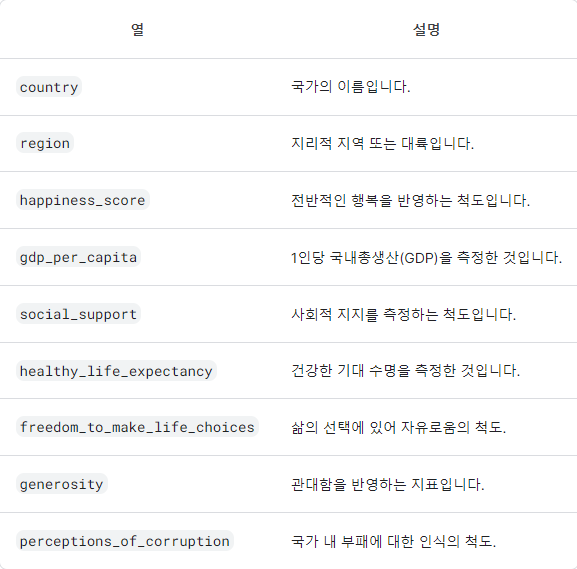

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np

In [104]:
hp_df["region"].duplicated().sum()

np.int64(127)

In [7]:
hp_df = pd.read_csv("./datasets/happiness_report_2023.csv")
hp_df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [8]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       137 non-null    object 
 1   region                        137 non-null    object 
 2   happiness_score               137 non-null    float64
 3   gdp_per_capita                137 non-null    float64
 4   social_support                137 non-null    float64
 5   healthy_life_expectancy       136 non-null    float64
 6   freedom_to_make_life_choices  137 non-null    float64
 7   generosity                    137 non-null    float64
 8   perceptions_of_corruption     137 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.8+ KB


In [18]:
hp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
happiness_score,137.0,5.539796,1.139929,1.859,4.7240,5.6840,6.3340,7.804
gdp_per_capita,137.0,1.406985,0.432963,0.000,1.0990,1.4490,1.7980,2.200
social_support,137.0,1.156212,0.326322,0.000,0.9620,1.2270,1.4010,1.620
healthy_life_expectancy,136.0,0.366176,0.156691,0.000,0.2485,0.3895,0.4875,0.702
freedom_to_make_life_choices,137.0,0.540000,0.149501,0.000,0.4550,0.5570,0.6560,0.772
generosity,137.0,0.148474,0.076053,0.000,0.0970,0.1370,0.1990,0.422
perceptions_of_corruption,137.0,0.145898,0.126723,0.000,0.0600,0.1110,0.1870,0.561


In [10]:
hp_df[hp_df.healthy_life_expectancy.isna()]

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
98,State of Palestine,Middle East and North Africa,4.908,1.144,1.309,NaN,0.416,0.065,0.067


In [11]:
hp_df_min = hp_df.fillna(hp_df.healthy_life_expectancy.min())
hp_df_mean = hp_df.fillna(hp_df.healthy_life_expectancy.mean())
hp_df_std = hp_df.fillna(hp_df.healthy_life_expectancy.std())
hp_df_max = hp_df.fillna(hp_df.healthy_life_expectancy.max())

In [31]:
hp_df_min.duplicated().sum()

np.int64(0)

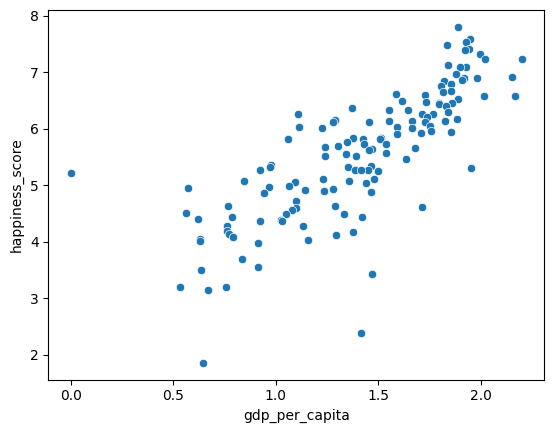

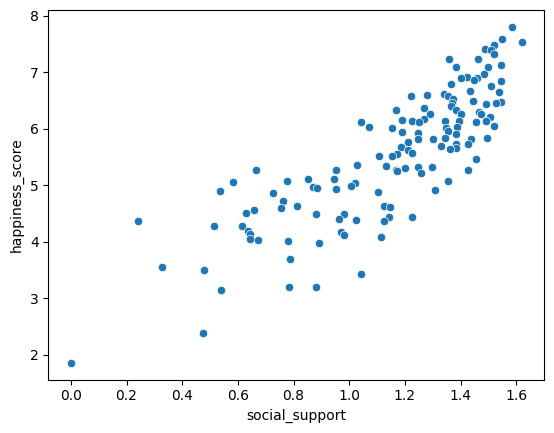

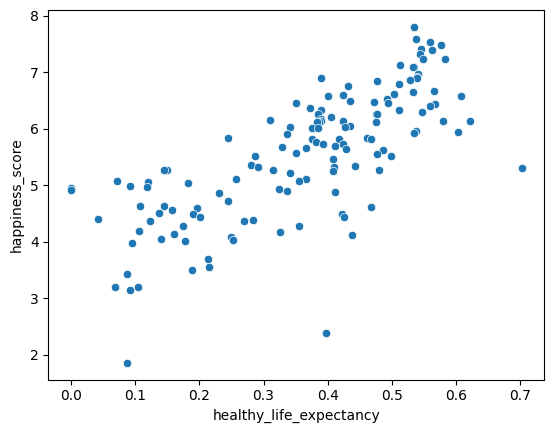

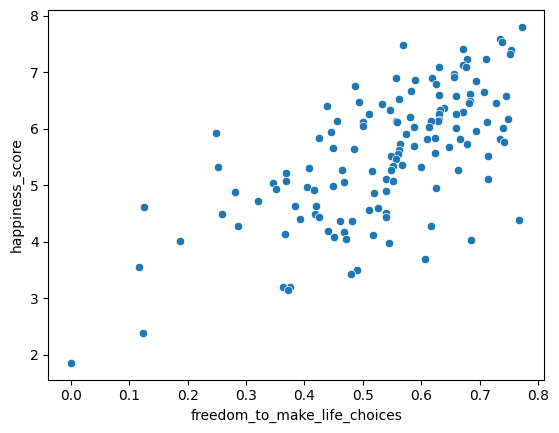

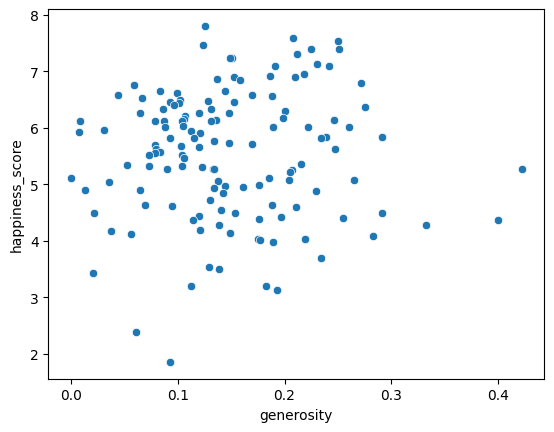

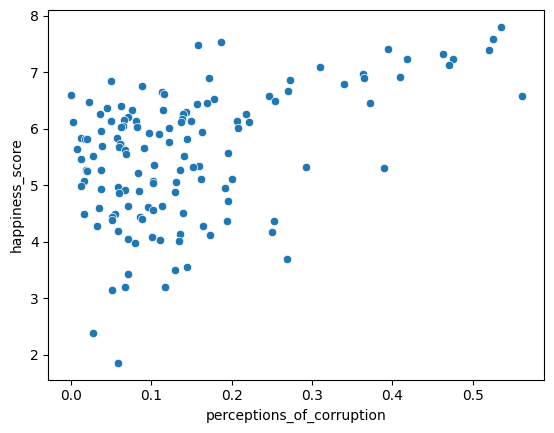

In [33]:
sns.scatterplot(x='gdp_per_capita', y='happiness_score', data=hp_df_min)
plt.show()
sns.scatterplot(x='social_support', y='happiness_score', data=hp_df_min)
plt.show()
sns.scatterplot(x='healthy_life_expectancy', y='happiness_score', data=hp_df_min)
plt.show()
sns.scatterplot(x='freedom_to_make_life_choices', y='happiness_score', data=hp_df_min)
plt.show()
sns.scatterplot(x='generosity', y='happiness_score', data=hp_df_min)
plt.show()
sns.scatterplot(x='perceptions_of_corruption', y='happiness_score', data=hp_df_min)
plt.show()

In [35]:
hp_df_min.columns

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')

In [37]:
cor_cols = hp_df_min.columns[2:]
hp_corr = hp_df_min[cor_cols].corr()
hp_corr

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
happiness_score,1.000000,0.784342,0.834604,0.740682,0.662909,0.043680,0.471913
gdp_per_capita,0.784342,1.000000,0.737993,0.830341,0.451405,-0.156780,0.436979
social_support,0.834604,0.737993,1.000000,0.702699,0.541832,0.035736,0.272538
healthy_life_expectancy,0.740682,0.830341,0.702699,1.000000,0.419864,-0.113725,0.406493
freedom_to_make_life_choices,0.662909,0.451405,0.541832,0.419864,1.000000,0.169685,0.383672
generosity,0.043680,-0.156780,0.035736,-0.113725,0.169685,1.000000,0.121712
perceptions_of_corruption,0.471913,0.436979,0.272538,0.406493,0.383672,0.121712,1.000000


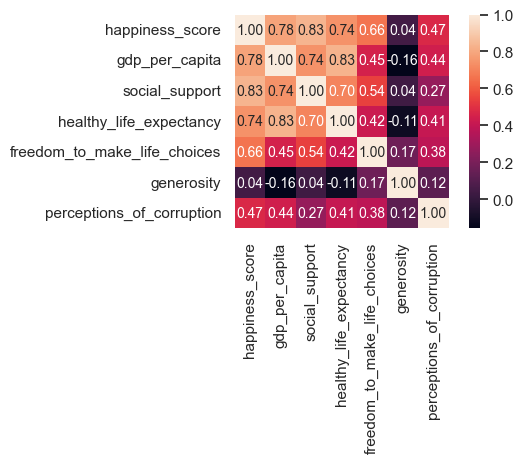

In [45]:
cols_label = ['happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption']

# 글자 크기 변경
# square 정사각형 
# cbar 색깔 바
# 숫자 표현 방법 정하기 fmt
# annot 상자안에 숫자표현  annot_kws 세부설정 
# xticklabels,yticklabels 각 줄 제목 넣기
sns.set(font_scale =1)
hm = sns.heatmap(hp_corr.values,cbar =True,
                 annot= True,square= True,fmt=".2f", annot_kws={"size" : 10},yticklabels=cols_label,
                 xticklabels=cols_label)
plt.tight_layout() # 겹쳐지는거 없이 여백 조절
plt.show()

상관계수로 보면 'social_support'가 행복과 가장 밀접한 연관이 있음

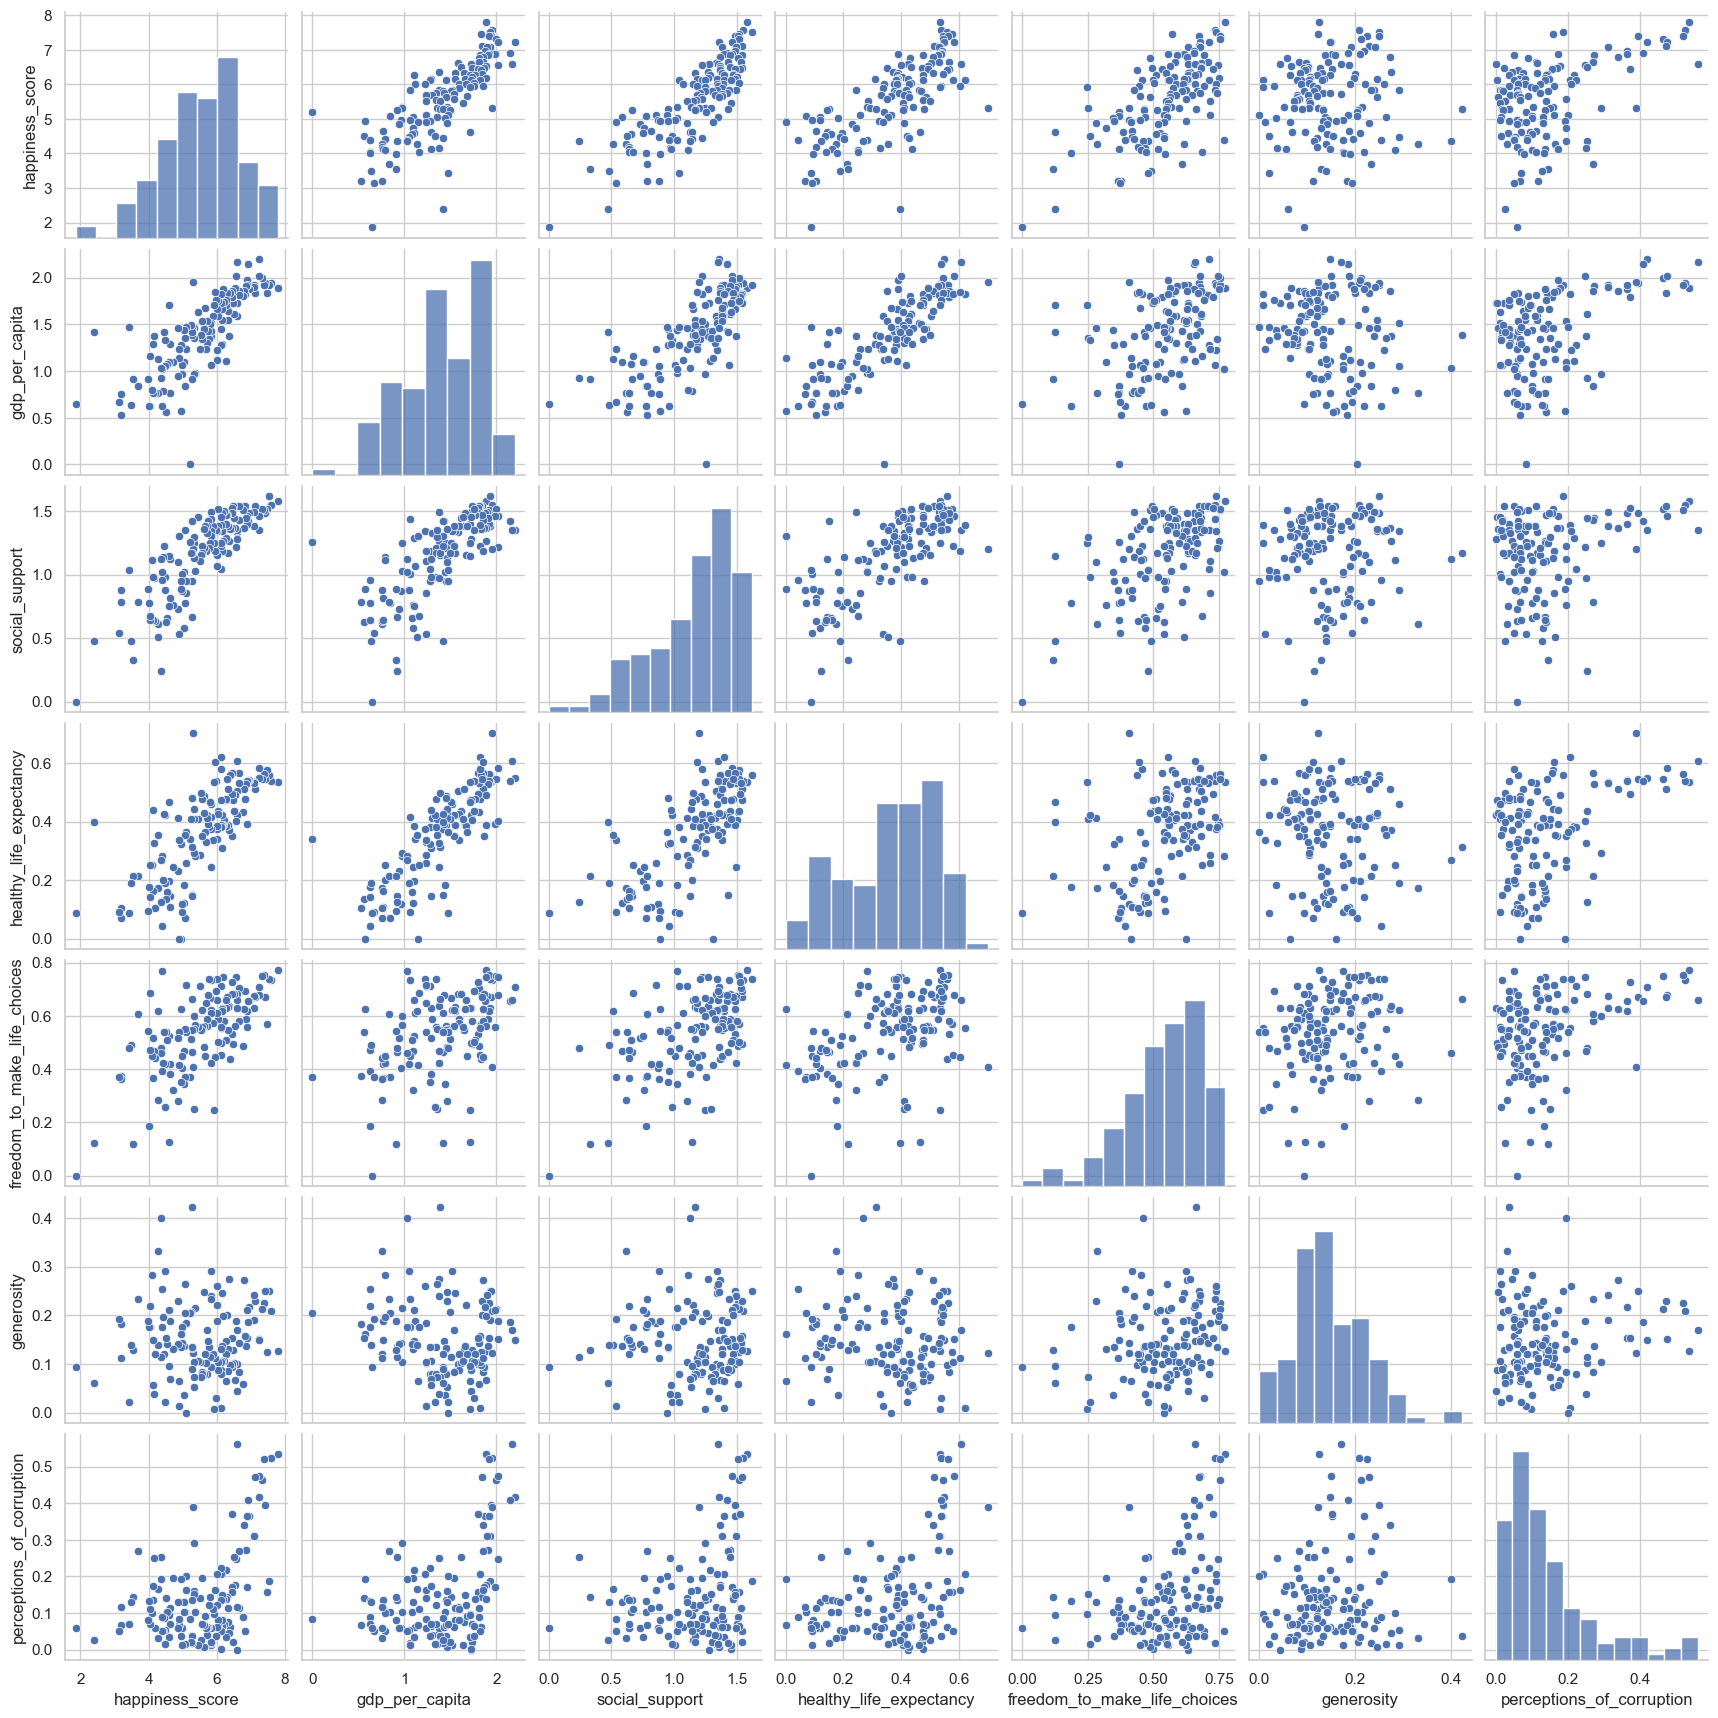

In [116]:
sns.set(style= "whitegrid") # 그래프 바탕을 흰색으로 해줌
sns.pairplot(hp_df_min[cor_cols],height=2.5)
plt.show()

In [78]:
stat = hp_df_min.groupby("region")["social_support"].agg(["mean","min","max","sum","std"])
stat

,mean,min,max,sum,std
region,,,,,
Central and Eastern Europe,1.361545,0.947,1.544,29.954,0.178881
Commonwealth of Independent States,1.381250,1.248,1.491,5.525,0.106940
East Asia,1.316667,1.188,1.494,7.900,0.122732
Latin America and Caribbean,1.260000,1.044,1.445,23.940,0.117720
Middle East and North Africa,1.081214,0.476,1.521,15.137,0.297326
North America and ANZ,1.496250,1.460,1.544,5.985,0.035331
South Asia,0.682500,0.000,1.224,4.095,0.425949
Southeast Asia,1.149333,0.853,1.354,10.344,0.154091
Sub-Saharan Africa,0.812788,0.242,1.428,26.822,0.261085


In [87]:
stat.reset_index()

,region,mean,min,max,sum,std
0,Central and Eastern Europe,1.361545,0.947,1.544,29.954,0.178881
1,Commonwealth of Independent States,1.381250,1.248,1.491,5.525,0.106940
2,East Asia,1.316667,1.188,1.494,7.900,0.122732
3,Latin America and Caribbean,1.260000,1.044,1.445,23.940,0.117720
4,Middle East and North Africa,1.081214,0.476,1.521,15.137,0.297326
5,North America and ANZ,1.496250,1.460,1.544,5.985,0.035331
6,South Asia,0.682500,0.000,1.224,4.095,0.425949
7,Southeast Asia,1.149333,0.853,1.354,10.344,0.154091
8,Sub-Saharan Africa,0.812788,0.242,1.428,26.822,0.261085
9,Western Europe,1.434950,1.224,1.620,28.699,0.101683


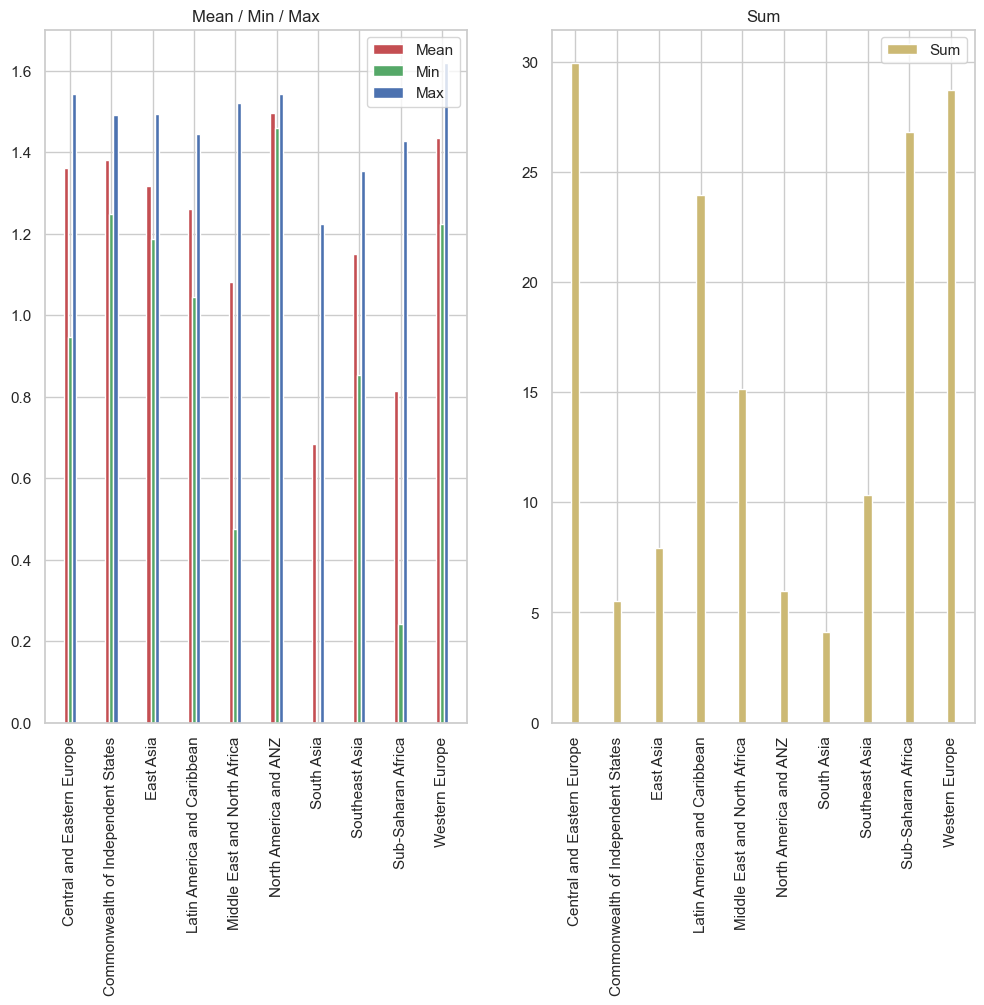

In [113]:
n_groups = len(stat)
fig, axes = plt.subplots(1, 2, figsize=(12, 9))
idx = np.arange(n_groups)

# 첫 번째 subplot: Mean, Min, Max
axes[0].bar(idx, stat["mean"], width=0.1, color="r", label="Mean")
axes[0].bar(idx + 0.1, stat["min"], width=0.1, color="g", label="Min")
axes[0].bar(idx + 0.2, stat["max"], width=0.1, color="b", label="Max")
axes[0].set_xticks(idx + 0.1)  # 바가 겹치지 않게 가운데 정렬
axes[0].set_xticklabels(stat.index, rotation=90)
axes[0].legend()
axes[0].set_title("Mean / Min / Max")

# 두 번째 subplot: Sum
axes[1].bar(idx, stat["sum"], width=0.2, color="y", label="Sum")
axes[1].set_xticks(idx)
axes[1].set_xticklabels(stat.index, rotation=90)
axes[1].legend()
axes[1].set_title("Sum")


plt.legend()
plt.show()

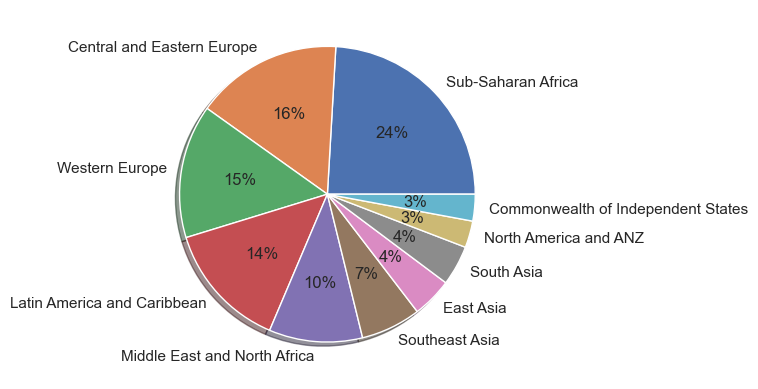

In [118]:
regions = hp_df_mean["region"].value_counts()
plt.pie(regions.values, labels= regions.index,autopct="%.0f%%",shadow=True)
plt.show()

In [94]:
hp_df_mean
hp_mean = hp_df_mean["happiness_score"].mean()

region_mean = hp_df_mean.groupby("region")["happiness_score"].mean()
region_mean[region_mean > hp_mean]

region
Central and Eastern Europe            5.967091
Commonwealth of Independent States    5.828250
East Asia                             5.930167
Latin America and Caribbean           5.966053
North America and ANZ                 7.018250
Western Europe                        6.894350
Name: happiness_score, dtype: float64

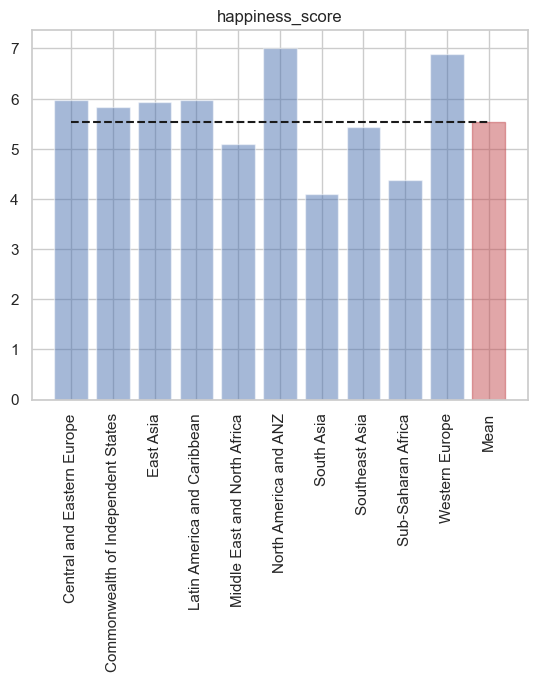

In [96]:
# 전체 평균도 시각화 해주기 위해서 대륙 리스트에 mean 추가
regions = region_mean.index.tolist() # 인덱스 리스트 넘기기
regions.append("Mean") # 인덱스 추가

x_pos = np.arange(len(regions))
hp = region_mean.tolist() # con_mean을 리스트화
hp.append(hp_mean) # 전체 평균 추가 

bar_list = plt.bar(x_pos,hp,alpha = 0.5)

# 마지막 바 만 빨간색으로 변경
bar_list[-1].set_color("r") # .set(color= "r") 이것도 가능

# 평균선 그리기
plt.plot([0,len(regions) -1 ],[hp_mean,hp_mean],"k--")
# 아래와 같은 방법도 있음
# plt.hlines(alc_mean,0,6,color="black",linestyle="solid") 
plt.xticks(x_pos,regions,rotation=90)
plt.title("happiness_score")
plt.show()

In [97]:
hp_df_mean
hp_mean = hp_df_mean["social_support"].mean()

region_mean = hp_df_mean.groupby("region")["social_support"].mean()
region_mean[region_mean > hp_mean]

region
Central and Eastern Europe            1.361545
Commonwealth of Independent States    1.381250
East Asia                             1.316667
Latin America and Caribbean           1.260000
North America and ANZ                 1.496250
Western Europe                        1.434950
Name: social_support, dtype: float64

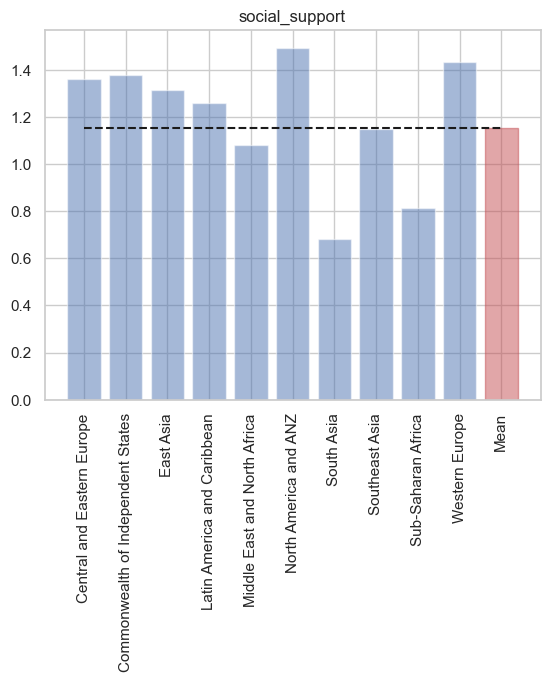

In [98]:
# 전체 평균도 시각화 해주기 위해서 대륙 리스트에 mean 추가
regions = region_mean.index.tolist() # 인덱스 리스트 넘기기
regions.append("Mean") # 인덱스 추가

x_pos = np.arange(len(regions))
hp = region_mean.tolist() # con_mean을 리스트화
hp.append(hp_mean) # 전체 평균 추가 

bar_list = plt.bar(x_pos,hp,alpha = 0.5)

# 마지막 바 만 빨간색으로 변경
bar_list[-1].set_color("r") # .set(color= "r") 이것도 가능

# 평균선 그리기
plt.plot([0,len(regions) -1 ],[hp_mean,hp_mean],"k--")
# 아래와 같은 방법도 있음
# plt.hlines(alc_mean,0,6,color="black",linestyle="solid") 
plt.xticks(x_pos,regions,rotation=90)
plt.title("social_support")
plt.show()

In [82]:
hp_df_mean.groupby("region").count().reset_index()

,region,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,22,22,22,22,22,22,22,22
1,Commonwealth of Independent States,4,4,4,4,4,4,4,4
2,East Asia,6,6,6,6,6,6,6,6
3,Latin America and Caribbean,19,19,19,19,19,19,19,19
4,Middle East and North Africa,14,14,14,14,14,14,14,14
5,North America and ANZ,4,4,4,4,4,4,4,4
6,South Asia,6,6,6,6,6,6,6,6
7,Southeast Asia,9,9,9,9,9,9,9,9
8,Sub-Saharan Africa,33,33,33,33,33,33,33,33
9,Western Europe,20,20,20,20,20,20,20,20


In [111]:
hp_df_mean.groupby("region")["social_support"].mean().idxmax()

'North America and ANZ'

In [112]:
group_social_support = hp_df_mean.groupby("region")["social_support"].sum()
group_social_support

region
Central and Eastern Europe            29.954
Commonwealth of Independent States     5.525
East Asia                              7.900
Latin America and Caribbean           23.940
Middle East and North Africa          15.137
North America and ANZ                  5.985
South Asia                             4.095
Southeast Asia                        10.344
Sub-Saharan Africa                    26.822
Western Europe                        28.699
Name: social_support, dtype: float64

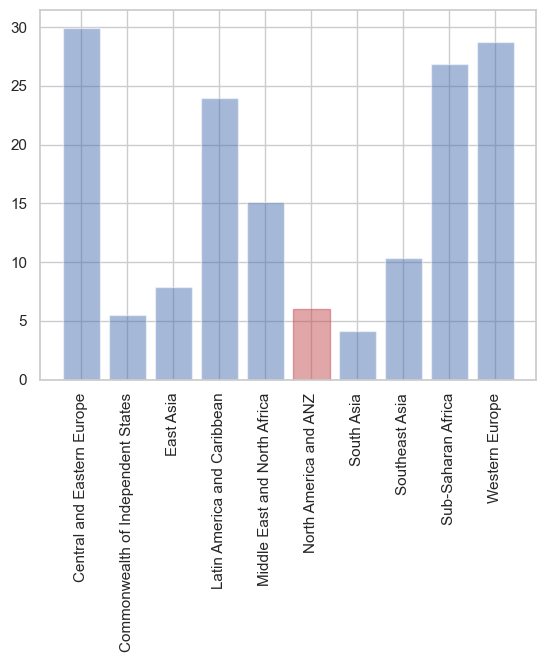

In [85]:
regions = group_social_support.index.tolist()
x_pos = np.arange(len(group_social_support))
bar_list = plt.bar(x_pos,group_social_support,alpha=0.5)
bar_list[regions.index("North America and ANZ")].set_color("r")
plt.xticks(x_pos,regions,rotation=90)
plt.show()

In [75]:
from scipy import stats

In [137]:
af = hp_df_mean[hp_df_mean["region"] == "North America and ANZ"]["social_support"]
eu = hp_df_mean[hp_df_mean["region"] == "Central and Eastern Europe"]["social_support"]

# 1️⃣ 분산 검정 (Levene’s test)
levene_stat, levene_p = stats.levene(af, eu)

print(f"Levene’s test p-value: {levene_p:f}")

Levene’s test p-value: 0.074554


In [138]:
# 2️⃣ t-test 실행 (분산 결과에 따라 선택)
if levene_p > 0.05:
    # 등분산 t-test
    t_stat, p_val = stats.ttest_ind(af, eu, equal_var=True)
    test_type = "Student's t-test (equal variance)"
else:
    # Welch t-test
    t_stat, p_val = stats.ttest_ind(af, eu, equal_var=False)
    test_type = "Welch's t-test (unequal variance)"

print(f"{test_type} 결과")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")

# 3️⃣ 유의미 여부 판단
if p_val < 0.05:
    print("결과: 평균 차이가 통계적으로 유의미합니다.")
else:
    print("결과: 평균 차이가 통계적으로 유의미하지 않습니다.")

Student's t-test (equal variance) 결과
t-statistic: 1.4769, p-value: 0.1527
결과: 평균 차이가 통계적으로 유의미하지 않습니다.


### 지역별 사회적 지원 평균 비교 (행복과 상관계수 0.83)

North America and ANZ와 Central and Eastern Europe 두 집단의 사회적 지원 수준 차이를 t-test를 통해 검정하였다.  

1. **분산 검정**  
   - Levene’s test 결과, p-value > 0.05 → 두 집단의 분산은 통계적으로 같음  
   - 따라서 Student's t-test(equal variance)를 사용

2. **t-test 결과**  
   - t-statistic: 1.4769  
   - p-value: 0.1527  

3. **해석**  
   - p-value > 0.05 이므로 두 집단 간 평균 차이는 **통계적으로 유의미하지 않음**  
   - 즉, North America and ANZ와 Central and Eastern Europe의 사회적 지원 평균은 유의미한 차이가 없다고 판단할 수 있음

> 결론적으로, 행복과 상관계수가 높은 사회적 지원 변수이지만, 선택한 두 지역 집단 간에는 평균 차이가 통계적으로 유의하지 않아, 지역별 차이를 일반화하기에는 제한적임을 시사한다.
